In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycharge as pc
import matplotlib

import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)



In [13]:
!rm plot/slice*

'rm' is not recognized as an internal or external command,
operable program or batch file.


6e-08


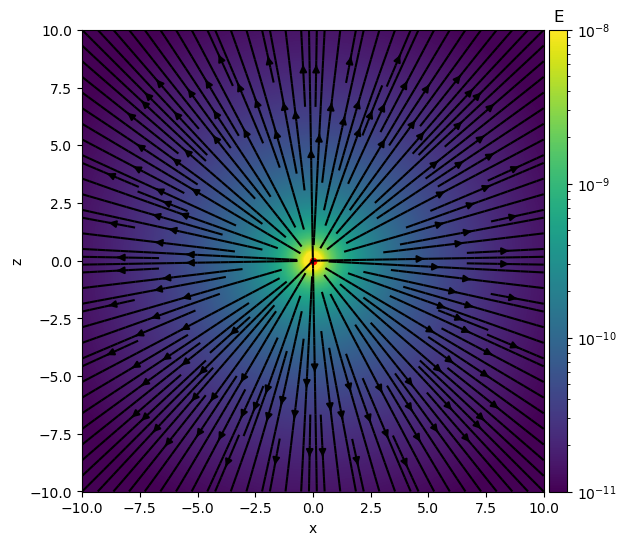

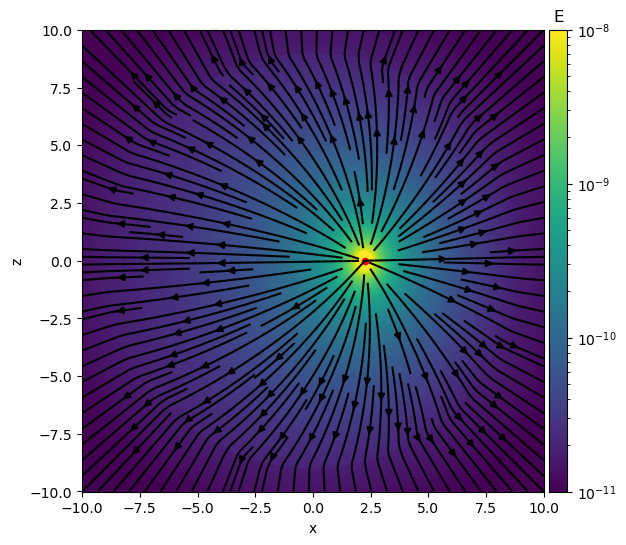

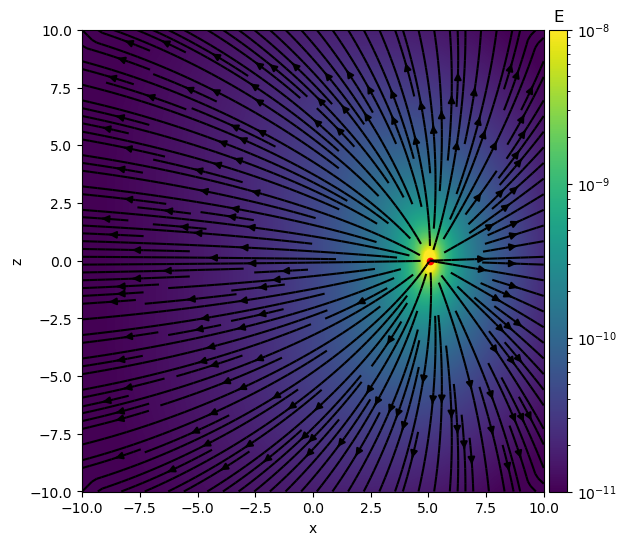

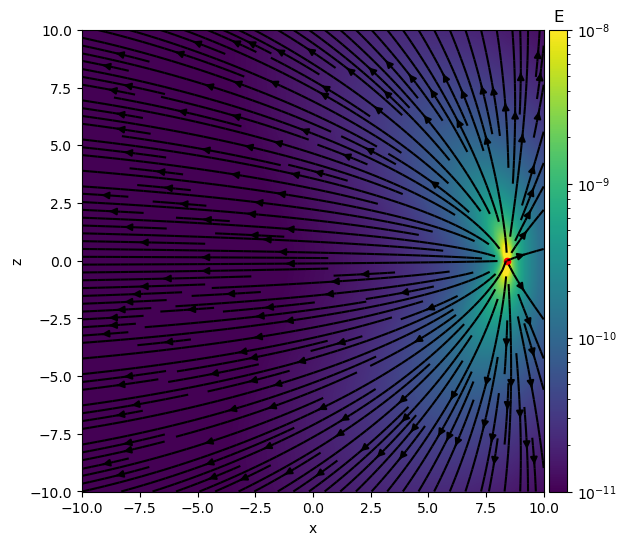

In [7]:
# METHODS: The code used for Problem One is included below

# Here, the relevant python modules are imported, including numpy and matplotlib. 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycharge as pc
import matplotlib

# The charge and grid are initialized in the following code. The following are declared: the speed of light, the upper limit of the grid size, the grid size, the maximum time, and the number of frames
# Additionally, the grid size was extended from a default of five to allow space for the charge's acceleration. 
#The x-axis is also partitioned into grid_size points between the limits of x==10 and x=10, and a meshgrid is declared with size x0 in the x and z directions. 
#Lastly, dt, is declared as a time interval by partitioning the total time into the specified number of frames
c = 3e8 
lim = 10 
grid_size = 1000 
x0=np.linspace(-lim, lim, grid_size) 
x, y, z = np.meshgrid(x0, 0, x0, indexing='ij') 
tmax=6e-8  
print(tmax) 
n_frame=50 
dt=tmax/n_frame 
 
    
# Here the LinearAccelerating Charge called with an 
charge = pc.LinearAcceleratingCharge(5e15,None) 
simulation = pc.Simulation(charge)

# The following code makes a plot at t=0 by iterating the time across dt intervals. 
#Importantly, Enorm defines the magnitude of the electric field (which is later plotted as a colormesh). 
i=0
t=i*dt
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
Ex = E_total[0][:, 0, :]
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)


#The following code makes a plot on the xz plane at t=0 with the magnitude of the electric field as a colormesh and the direction of the field vectors (E_x and E_z) as a streamplot.
#All axes are appropriately labeled and the resulting figure is saved. 
fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter(charge.xpos([t]), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.savefig('t=0.png')
plt.show()


#Likewise, the following code makes a plot on the xz plane at t=3e-8 with the magnitude of the electric field as a colormesh and the direction of the field vectors (E_x and E_z) as a streamplot.
#All axes are appropriately labeled and the resulting figure is saved. 
#(Note, the time t=3e-8 was chosen to allow enough time for the charge to substantially advance in the x-coordinate). 
i=0
t=3e-8
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
Ex = E_total[0][:, 0, :]
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)


fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter(charge.xpos([t]), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.savefig('t=3.png')
plt.show()

#Likewise, the following code makes a plot on the xz plane at t=4.5e-8 with the magnitude of the electric field as a colormesh and the direction of the field vectors (E_x and E_z) as a streamplot.
#All axes are appropriately labeled and the resulting figure is saved. 
#(Note, the time t=4.5e-8 was chosen to roughly equalize the distance advanced by the accelerating charge with the previous advancement). 
i=0
t=4.5e-8
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
Ex = E_total[0][:, 0, :]
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)

fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter(charge.xpos([t]), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.savefig('t=4.5.png')
plt.show()


#Likewise, the following code makes a plot on the xz plane at t=5.8e-8 with the magnitude of the electric field as a colormesh and the direction of the field vectors (E_x and E_z) as a streamplot.
#All axes are appropriately labeled and the resulting figure is saved. 
#(Note, the time t=5.8e-8 was chosen to demonstrate the extent of dilation just before the end of the time window. 
t=5.8e-8
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
Ex = E_total[0][:, 0, :]
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)

fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter(charge.xpos([t]), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.savefig('t=5.8.png')
plt.show()


#The following code makes an animation by iterating across the total number of frames specified earlier, n_frame+1. 
#Much of the same code from above is replicated to plot the E field; the field vector parallel to the xz plane are plotted as a vector plot and the magnitude is again plotted as a colormesh.
#The final two lines of code save the animation to the system. 
import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

for i in range(0,n_frame+1):
    t=i*dt
    E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
    Ex = E_total[0][:, 0, :]
    Ey = E_total[1][:, 0, :]
    Ez = E_total[2][:, 0, :]
    Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)
    fig=plt.figure(figsize=(7,6))
    ax=fig.add_subplot(111)
    vmin=1e-11
    vmax=1e-8
    im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
    stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
    pos = ax.scatter(charge.xpos([t]), 0, s=20, c='red', marker='o')
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("z")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('E')
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()
    
    !ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p a=5e15.mp4
!rm plot/slice*